## Preprocessing

In [23]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS', 'STATUS'])

In [25]:
#confirm the columsn were removed
application_df.head(0)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL


In [26]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [27]:
application_df['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [28]:
# Assign values counts to a variable to create bins. 
ammount_counts = application_df['ASK_AMT'].value_counts()
# gather all the application types that will be binned into "Other"
ammount_types_to_replace = list(ammount_counts[ammount_counts<2].index)

In [29]:
# Replace in dataframe
for count in ammount_types_to_replace:
    application_df['ASK_AMT'] = application_df['ASK_AMT'].replace(count,"Other")

# Check to make sure binning was successful
application_df['ASK_AMT'].value_counts()

5000     25398
Other     8595
63981        3
15583        3
6725         3
         ...  
40429        2
57588        2
20537        2
34875        2
5731         2
Name: ASK_AMT, Length: 153, dtype: int64

In [30]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [31]:
# Assign values counts to a variable to create bins. 
application_counts = application_df['APPLICATION_TYPE'].value_counts()
# gather all the application types that will be binned into "Other"
application_types_to_replace = list(application_counts[application_counts<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [32]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [33]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [34]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [35]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [36]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummy_df = pd.get_dummies(application_df)
application_dummy_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ASK_AMT_195661,ASK_AMT_201112,ASK_AMT_206725,ASK_AMT_210432,ASK_AMT_238933,ASK_AMT_240780,ASK_AMT_246851,ASK_AMT_350000,ASK_AMT_1427468,ASK_AMT_Other
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
# Split our preprocessed data into our features and target arrays
X = application_dummy_df.drop("IS_SUCCESSFUL", axis=1).values
y = application_dummy_df["IS_SUCCESSFUL"].values
print(X.shape, y.shape)

(34299, 192) (34299,)


In [38]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27439, 192) (27439,) (6860, 192) (6860,)


In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(27439, 192) (6860, 192)


## Compile, Train and Evaluate the Model

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=192))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                15440     
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 17,901
Trainable params: 17,901
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, validation_split=0.20, epochs=80)

Epoch 1/80
686/686 [==============================] - 2s 2ms/step - loss: 0.5912 - accuracy: 0.7154 - val_loss: 0.5561 - val_accuracy: 0.7314
Epoch 2/80
686/686 [==============================] - 1s 1ms/step - loss: 0.5575 - accuracy: 0.7277 - val_loss: 0.5541 - val_accuracy: 0.7331
Epoch 3/80
686/686 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7292 - val_loss: 0.5571 - val_accuracy: 0.7356
Epoch 4/80
686/686 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7307 - val_loss: 0.5546 - val_accuracy: 0.7367
Epoch 5/80
686/686 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7299 - val_loss: 0.5553 - val_accuracy: 0.7362
Epoch 6/80
686/686 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7305 - val_loss: 0.5528 - val_accuracy: 0.7314
Epoch 7/80
686/686 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7324 - val_loss: 0.5507 - val_accuracy: 0.7362
Epoch 

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.6299 - accuracy: 0.7220 - 161ms/epoch - 750us/step
Loss: 0.6298809051513672, Accuracy: 0.7220116853713989


<AxesSubplot:>

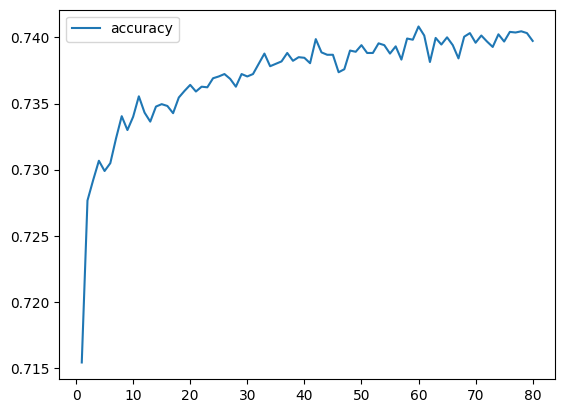

In [44]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

Putting ASK_AMT (Ask Ammount) bins with values ask below 1 and assigning it to 'Other', and adding additional hidden layers performed the same as Attempt 1. Next I will attempt to instead add the Name of the organization back to see if that additional feature will improve the model.